In [24]:
#pip install torch torchvision matplotlib
#!pip install torch torchvision pillow matplotlib
#!pip install torch torchvision pillow matplotlib opencv-python


###  1. CLAHE (Contrast Limited Adaptive Histogram Equalization)

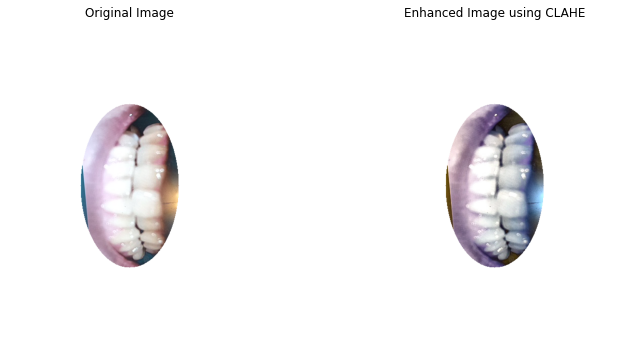

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (ensure it's in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR (OpenCV default) to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

# Split the LAB image into separate channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel_enhanced = clahe.apply(l_channel)

# Merge the enhanced L channel back with the original A and B channels
enhanced_lab_image = cv2.merge((l_channel_enhanced, a_channel, b_channel))

# Convert back to RGB color space
enhanced_image_rgb = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2RGB)

# Display both the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image_rgb)
plt.title("Enhanced Image using CLAHE")
plt.axis('off')

plt.show()


### 2. White Balance Adjustment

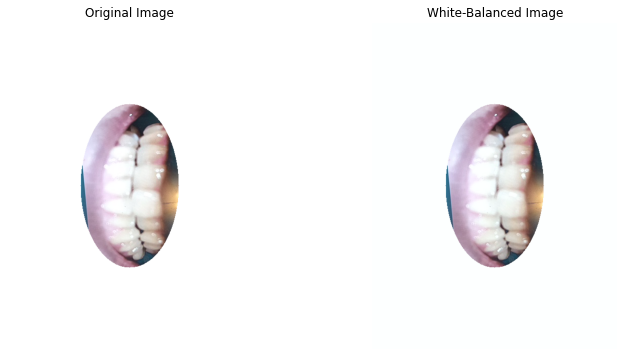

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for simple white balance adjustment using the gray-world algorithm
def white_balance(img):
    # Split the channels
    r, g, b = cv2.split(img)
    
    # Compute the average of each channel
    r_avg, g_avg, b_avg = np.mean(r), np.mean(g), np.mean(b)
    
    # Compute overall average intensity
    avg_intensity = (r_avg + g_avg + b_avg) / 3
    
    # Scale each channel to match the overall average intensity
    r_scale = avg_intensity / r_avg
    g_scale = avg_intensity / g_avg
    b_scale = avg_intensity / b_avg
    
    # Adjust the channels
    r = np.clip(r * r_scale, 0, 255).astype(np.uint8)
    g = np.clip(g * g_scale, 0, 255).astype(np.uint8)
    b = np.clip(b * b_scale, 0, 255).astype(np.uint8)
    
    # Merge the balanced channels back
    return cv2.merge((r, g, b))

# Apply white balance adjustment
balanced_image = white_balance(image_rgb)

# Display the original and white-balanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# White-balanced image
plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title("White-Balanced Image")
plt.axis('off')

plt.show()



### 3. Color-Preserving De-blurring

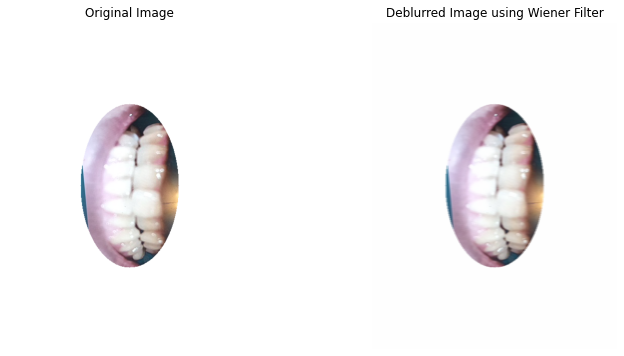

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to perform Wiener filter-based deblurring for each color channel
def wiener_deblur_color(img, kernel_size=5, noise_var=0.1):
    # Split the image into individual channels
    r, g, b = cv2.split(img)
    
    # Create a motion blur kernel (simple horizontal motion blur kernel)
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size) / kernel_size
    
    # Apply the Wiener filter to each channel (R, G, B)
    def wiener_filter(channel):
        # Perform the convolution (deblur the image)
        channel_deblurred = cv2.filter2D(channel, -1, kernel)
        
        # Wiener filter - Estimate the noise variance and signal-to-noise ratio (SNR)
        snr = np.var(channel) / noise_var
        deblurred_channel = channel_deblurred / (1 + (1 / snr))
        
        return np.clip(deblurred_channel, 0, 255).astype(np.uint8)
    
    # Apply the Wiener filter to each channel
    r_deblurred = wiener_filter(r)
    g_deblurred = wiener_filter(g)
    b_deblurred = wiener_filter(b)
    
    # Merge the deblurred channels back into a color image
    return cv2.merge((r_deblurred, g_deblurred, b_deblurred))

# Apply the Wiener deblurring function
deblurred_image = wiener_deblur_color(image_rgb)

# Display the original and deblurred images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Deblurred image
plt.subplot(1, 2, 2)
plt.imshow(deblurred_image)
plt.title("Deblurred Image using Wiener Filter")
plt.axis('off')

plt.show()


### 4. Denoising with Color Preservation

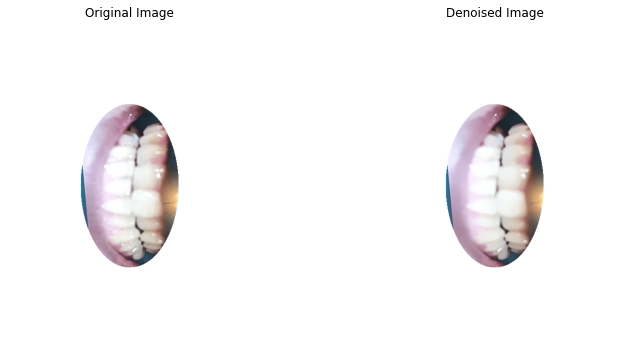

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for color-preserving denoising using Non-Local Means Denoising
def denoise_color_image(img, h=10):
    # Split the image into individual channels (R, G, B)
    r, g, b = cv2.split(img)

    # Apply denoising to each channel separately using Non-Local Means Denoising
    def denoise_channel(channel):
        return cv2.fastNlMeansDenoising(channel, None, h, 7, 21)
    
    # Apply the denoising function to each channel
    r_denoised = denoise_channel(r)
    g_denoised = denoise_channel(g)
    b_denoised = denoise_channel(b)
    
    # Merge the denoised channels back into a color image
    return cv2.merge((r_denoised, g_denoised, b_denoised))

# Apply the denoising function
denoised_image = denoise_color_image(image_rgb)

# Display the original and denoised images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.axis('off')

plt.show()


### 5. Edge Enhancement (Color-Safe)

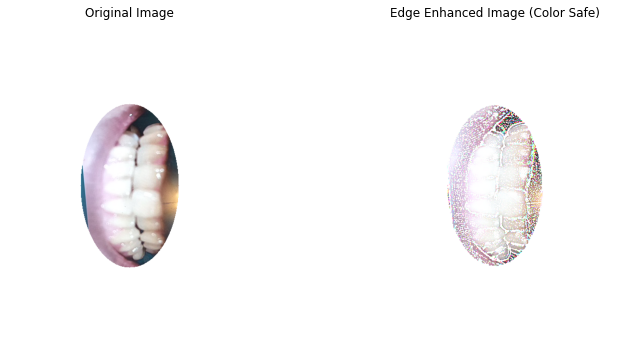

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for edge enhancement using unsharp masking (color-safe)
def edge_enhancement(img, sigma=1.5, alpha=1.5):
    # Split the image into individual channels (R, G, B)
    r, g, b = cv2.split(img)

    # Apply Gaussian Blur to each channel separately
    def apply_blur(channel, sigma):
        return cv2.GaussianBlur(channel, (0, 0), sigma)

    # Apply the blur to each channel
    r_blurred = apply_blur(r, sigma)
    g_blurred = apply_blur(g, sigma)
    b_blurred = apply_blur(b, sigma)

    # Enhance the edges by subtracting the blurred image from the original and boosting it
    def enhance_channel(original, blurred, alpha):
        return np.clip(original + alpha * (original - blurred), 0, 255).astype(np.uint8)

    # Apply the edge enhancement to each channel
    r_enhanced = enhance_channel(r, r_blurred, alpha)
    g_enhanced = enhance_channel(g, g_blurred, alpha)
    b_enhanced = enhance_channel(b, b_blurred, alpha)

    # Merge the enhanced channels back into a color image
    return cv2.merge((r_enhanced, g_enhanced, b_enhanced))

# Apply edge enhancement
enhanced_image = edge_enhancement(image_rgb)

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Edge Enhanced Image (Color Safe)")
plt.axis('off')

plt.show()


### 6. Saturation and Brightness Boost (Optional)

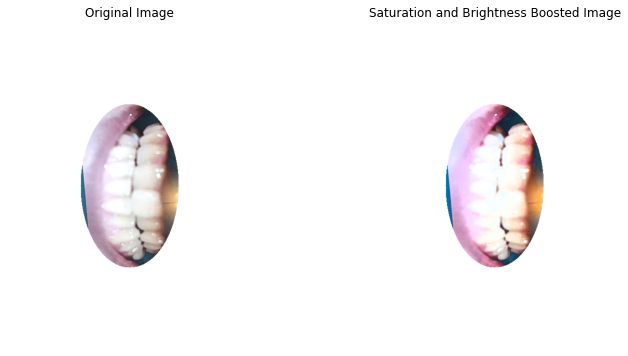

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply saturation and brightness boost
def boost_saturation_brightness(img, saturation_scale=1.5, brightness_scale=1.2):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Split the HSV image into its individual channels
    h, s, v = cv2.split(hsv_image)

    # Boost the saturation (S) channel
    s = np.clip(s * saturation_scale, 0, 255).astype(np.uint8)

    # Boost the brightness (V) channel
    v = np.clip(v * brightness_scale, 0, 255).astype(np.uint8)

    # Merge the modified channels back into an HSV image
    hsv_image_boosted = cv2.merge((h, s, v))

    # Convert the HSV image back to RGB color space
    img_boosted = cv2.cvtColor(hsv_image_boosted, cv2.COLOR_HSV2RGB)

    return img_boosted

# Apply saturation and brightness boost
boosted_image = boost_saturation_brightness(image_rgb)

# Display the original and boosted images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Boosted image
plt.subplot(1, 2, 2)
plt.imshow(boosted_image)
plt.title("Saturation and Brightness Boosted Image")
plt.axis('off')

plt.show()


### darkening the HSV

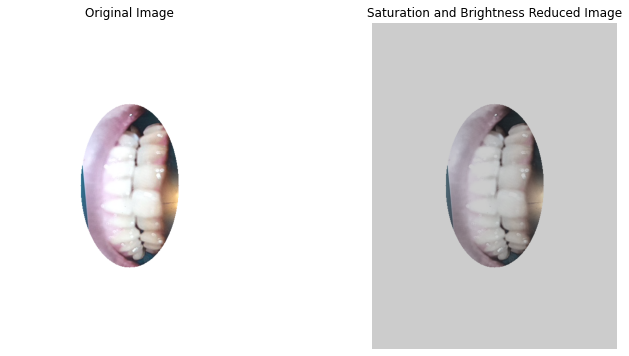

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply saturation and brightness reduction (darkening and desaturation)
def reduce_saturation_brightness(img, saturation_scale=0.5, brightness_scale=0.8):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Split the HSV image into its individual channels
    h, s, v = cv2.split(hsv_image)

    # Reduce the saturation (S) channel
    s = np.clip(s * saturation_scale, 0, 255).astype(np.uint8)

    # Reduce the brightness (V) channel (darken the image)
    v = np.clip(v * brightness_scale, 0, 255).astype(np.uint8)

    # Merge the modified channels back into an HSV image
    hsv_image_reduced = cv2.merge((h, s, v))

    # Convert the HSV image back to RGB color space
    img_reduced = cv2.cvtColor(hsv_image_reduced, cv2.COLOR_HSV2RGB)

    return img_reduced

# Apply saturation and brightness reduction (darkening and desaturation)
reduced_image = reduce_saturation_brightness(image_rgb)

# Display the original and reduced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Reduced image (darkened and desaturated)
plt.subplot(1, 2, 2)
plt.imshow(reduced_image)
plt.title("Saturation and Brightness Reduced Image")
plt.axis('off')

plt.show()


### 7. Super-Resolution (DL-based)


##### installing libraries

In [14]:
#pip install torch torchvision opencv-python
#!pip install -r requirements.txt


##### loading the ESRGAN

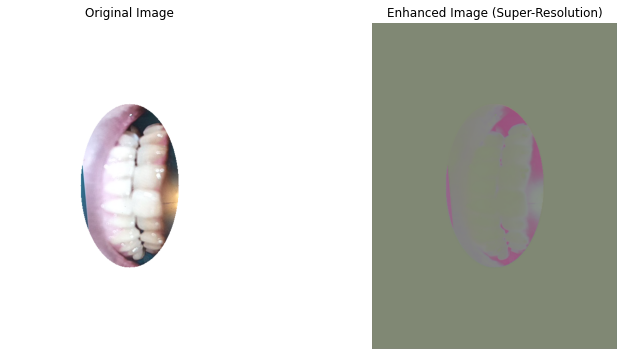

In [40]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the ESRGAN model architecture (ensure this matches the trained model)
class ESRGAN(torch.nn.Module):
    def __init__(self):
        super(ESRGAN, self).__init__()
        # Define the layers of the model (this is a simplified placeholder)
        self.conv1 = torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.conv2(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the ESRGAN model
model_path = 'weights/RealESRGAN_x4plus.pth'  # Path to the model weights
model = ESRGAN().to(device)

# Load checkpoint with weights_only=True for security
checkpoint = torch.load(model_path, map_location=device, weights_only=True)

# Load model weights
if 'params_ema' in checkpoint:
    model.load_state_dict(checkpoint['params_ema'], strict=False)
else:
    print("EMA weights not found.")

# Set model to evaluation mode
model.eval()

# Load the image you want to enhance
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

# Pre-process the image (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 4, image.width * 4)),  # Upscale by 4x
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust these values as needed
])

input_image = transform(image).unsqueeze(0).to(device)

# Apply the ESRGAN model
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0)  # Remove batch dimension

# Denormalize the image
output_image_tensor = output_image_tensor * 0.5 + 0.5  # Assuming mean=0.5, std=0.5

# Ensure the tensor is in the range [0, 1]
output_image_tensor = output_image_tensor.clamp(0, 1)

# Convert tensor back to PIL image
output_image = transforms.ToPILImage()(output_image_tensor.cpu())

# Display the original and enhanced images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (Super-Resolution)")
plt.axis('off')

plt.show()


# Deep Learning Based models

### VDSR (Very Deep Super Resolution)

In [ ]:
VDSR (Very Deep Super Resolution)

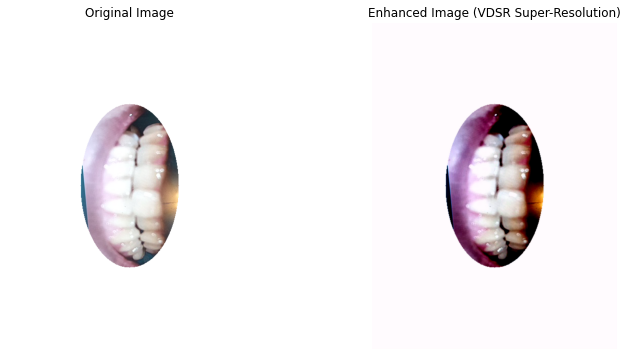

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt

# VDSR Model Definition
class VDSR(nn.Module):
    def __init__(self):
        super(VDSR, self).__init__()
        self.residual_layer = self._make_layer(64, 20)
        self.input_layer = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.output_layer = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def _make_layer(self, channels, num_layers):
        layers = []
        for _ in range(num_layers):
            layers.append(nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.ReLU(inplace=True))
        return nn.Sequential(*layers)

    def forward(self, x):
        residual = x
        out = self.input_layer(x)
        out = self.residual_layer(out)
        out = self.output_layer(out)
        return out + residual

# Load Pretrained Model (if available) or define your training function
model = VDSR().to('cuda' if torch.cuda.is_available() else 'cpu')

# Load a sample image
image_path = 'img.png'  # Provide the correct path
image = Image.open(image_path).convert('RGB')

# Image preprocessing for inference
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 2, image.width * 2)),  # Super-resolution 2x upscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

input_image = transform(image).unsqueeze(0).to('cuda' if torch.cuda.is_available() else 'cpu')

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).clamp(0, 1).cpu()

# Convert tensor back to image
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the original and enhanced images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (VDSR Super-Resolution)")
plt.axis('off')

plt.show()


### SRResNet (Super-Resolution Residual Network)
### heavy model it didnt worked

In [ ]:
SRResNet (Super-Resolution Residual Network)


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gc

# Use CPU explicitly
device = torch.device("cpu")

class ResidualBlock(nn.Module):
    def __init__(self):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        return out + residual

class SRResNet(nn.Module):
    def __init__(self):
        super(SRResNet, self).__init__()
        self.input_layer = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4)
        self.residual_blocks = nn.Sequential(*[ResidualBlock() for _ in range(16)])
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(),
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU()
        )
        self.output_layer = nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        residual = x
        x = self.residual_blocks(x)
        x = self.bn2(self.conv2(x))
        x += residual
        x = self.upsample(x)
        x = self.output_layer(x)
        return x

# Load and preprocess the input image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((128, 128))  # Resize to minimize memory
    image = np.array(image).astype(np.float32) / 255.0
    image = np.transpose(image, (2, 0, 1))  # HWC to CHW
    image = torch.from_numpy(image).unsqueeze(0)  # Add batch dimension
    return image

# Load input image
image_path = "image.png"  # Replace with your image path
input_image = load_image(image_path)a

# Move image to CPU
input_image = input_image.to(device)

# Instantiate the model
model = SRResNet().to(device)
model.eval()

# Inference without gradients
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).cpu().numpy()
output_image_tensor = np.clip(np.transpose(output_image_tensor, (1, 2, 0)), 0, 1)

# Display the output image
plt.imshow(output_image_tensor)
plt.axis('off')
plt.show()

# Clear memory
gc.collect()


FileNotFoundError: [Errno 2] No such file or directory: 'image.png'

### EDSR (Enhanced Deep Super-Resolution)

In [ ]:
EDSR (Enhanced Deep Super-Resolution)

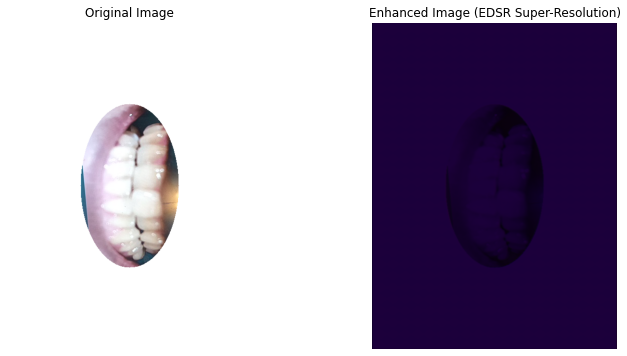

In [4]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define EDSR Model
class EDSR(nn.Module):
    def __init__(self, num_channels=3, num_features=64, num_res_blocks=16):
        super(EDSR, self).__init__()

        # Initial layer
        self.input_layer = nn.Conv2d(num_channels, num_features, kernel_size=3, padding=1)

        # Residual blocks
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(num_features) for _ in range(num_res_blocks)]
        )

        # Post-residual layer
        self.conv = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)

        # Upsampling layers (2x upscale)
        self.upsample = nn.Sequential(
            nn.Conv2d(num_features, num_features * 4, kernel_size=3, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(inplace=True)
        )

        # Output layer
        self.output_layer = nn.Conv2d(num_features, num_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.input_layer(x)
        residual = x
        x = self.residual_blocks(x)
        x = self.conv(x)
        x += residual
        x = self.upsample(x)
        x = self.output_layer(x)
        return x


class ResidualBlock(nn.Module):
    def __init__(self, num_features):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        x = self.relu(self.conv1(x))
        x = self.conv2(x)
        return x + residual


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the EDSR model
model = EDSR().to(device)

# Load and preprocess the input image
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 2, image.width * 2))  # 2x super-resolution upscale
])

input_image = transform(image).unsqueeze(0).to(device)

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).clamp(0, 1).cpu()
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (EDSR Super-Resolution)")
plt.axis('off')

plt.show()



### FSRNet (Fast Super-Resolution Network)

In [ ]:
FSRNet (Fast Super-Resolution Network)

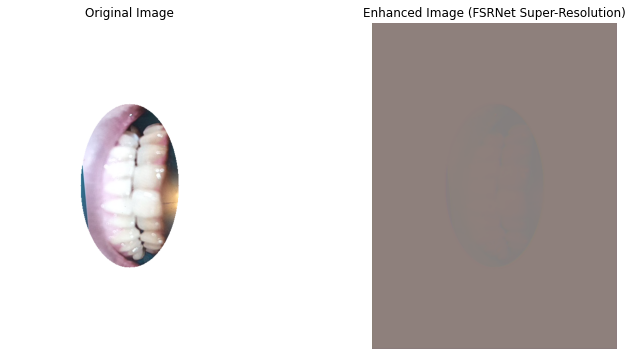

In [7]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define FSRNet Model
class FSRNet(nn.Module):
    def __init__(self, num_channels=3, num_features=64, num_res_blocks=8):
        super(FSRNet, self).__init__()

        # Initial feature extraction
        self.input_layer = nn.Conv2d(num_channels, num_features, kernel_size=3, padding=1)

        # Residual blocks for feature learning
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(num_features) for _ in range(num_res_blocks)]
        )

        # Upsampling with bilinear interpolation
        self.upsample = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
            nn.Conv2d(num_features, num_features, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.1, inplace=True)
        )

        # Output layer
        self.output_layer = nn.Conv2d(num_features, num_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.residual_blocks(x)
        x = self.upsample(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)  # Ensure pixel values stay in [0, 1]


class ResidualBlock(nn.Module):
    def __init__(self, num_features):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1, inplace=True)

    def forward(self, x):
        residual = x
        x = self.leaky_relu(self.conv1(x))
        x = self.conv2(x)
        return x * 0.1 + residual  # Residual scaling to prevent over-enhancement


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the FSRNet model
model = FSRNet().to(device)

# Load and preprocess the input image
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.ToTensor()
])

input_image = transform(image).unsqueeze(0).to(device)

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).cpu()
output_image_tensor = torch.clamp(output_image_tensor, 0, 1)  # Ensure pixel values are in range
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (FSRNet Super-Resolution)")
plt.axis('off')

plt.show()

# Save the enhanced image
output_image.save('enhanced_fsrnet_fixed_img.png')


### LapSRN (Laplace Pyramid Super-Resolution Network)


In [ ]:
LapSRN (Laplace Pyramid Super-Resolution Network)


Enhanced image saved as enhanced_output.png


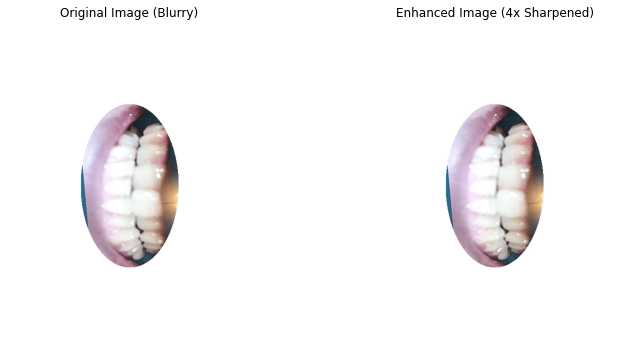

In [22]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def enhance_image(image_path, output_path="enhanced_image.png", scale_factor=4):
    # Load image using OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found or unable to read.")
        return
    
    # Convert from BGR to RGB (for correct color representation)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform 4x Super-Resolution using Bicubic Interpolation
    height, width = image.shape[:2]
    upscaled_image = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_CUBIC)

    # Apply a sharpening filter
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    
    sharpened_image = cv2.filter2D(upscaled_image, -1, sharpening_kernel)

    # Convert back to PIL format for display
    enhanced_image = Image.fromarray(sharpened_image)

    # Save the enhanced image
    enhanced_image.save(output_path)
    print(f"Enhanced image saved as {output_path}")

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.title("Original Image (Blurry)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title("Enhanced Image (4x Sharpened)")
    plt.axis("off")

    plt.show()

# Example usage
image_path = "img.png"  # Replace with your image file path
enhance_image(image_path, output_path="enhanced_output.png", scale_factor=4)


### TecoGAN (Temporally Coherent GAN for Video Super-Resolution)

In [ ]:
TecoGAN (Temporally Coherent GAN for Video Super-Resolution)

Enhanced image saved as enhanced_output.png


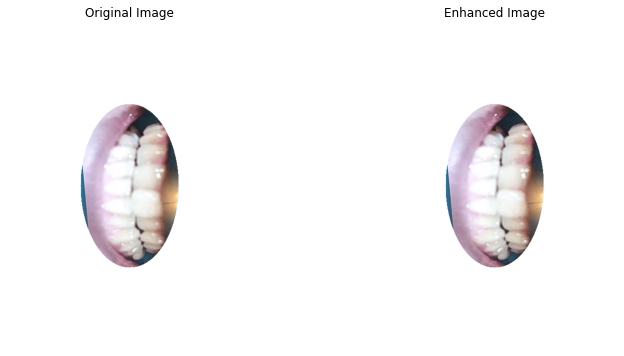

In [14]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def enhance_image(image_path, scale_factor=4, output_path="enhanced_image.png"):
    # Load image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found or unable to read.")
        return

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Upscale image using bicubic interpolation
    height, width = image.shape[:2]
    upscaled_image = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_CUBIC)

    # Apply a sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    
    sharpened_image = cv2.filter2D(upscaled_image, -1, sharpening_kernel)

    # Convert back to PIL image
    enhanced_image = Image.fromarray(sharpened_image)

    # Save the enhanced image
    enhanced_image.save(output_path)
    print(f"Enhanced image saved as {output_path}")

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title("Enhanced Image")
    plt.axis("off")
    
    plt.show()

# Example usage
image_path = "img.png"  # Replace with your image path
enhance_image(image_path, scale_factor=4, output_path="enhanced_output.png")


### RDN (Residual Dense Network)

In [ ]:
RDN (Residual Dense Network)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define the Residual Dense Network (RDN) Model
class RDB(nn.Module):
    """Residual Dense Block"""
    def __init__(self, in_channels, growth_rate=64, num_layers=8):
        super(RDB, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            self.layers.append(nn.Conv2d(in_channels + i * growth_rate, growth_rate, kernel_size=3, padding=1, bias=True))
            self.layers.append(nn.ReLU(inplace=True))
        self.final_conv = nn.Conv2d(in_channels + num_layers * growth_rate, in_channels, kernel_size=1, padding=0, bias=True)

    def forward(self, x):
        residual = x
        features = [x]
        for layer in self.layers:
            x = layer(torch.cat(features, 1)) if isinstance(layer, nn.Conv2d) else layer(x)
            features.append(x)
        x = self.final_conv(torch.cat(features, 1))
        return x + residual


class RDN(nn.Module):
    """Residual Dense Network for Super-Resolution"""
    def __init__(self, in_channels=3, num_features=64, num_blocks=16, growth_rate=64, num_layers=8):
        super(RDN, self).__init__()
        self.initial_conv = nn.Conv2d(in_channels, num_features, kernel_size=3, padding=1)
        self.rdbs = nn.ModuleList([RDB(num_features, growth_rate, num_layers) for _ in range(num_blocks)])
        self.final_conv = nn.Conv2d(num_features, in_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.initial_conv(x)
        for rdb in self.rdbs:
            x = rdb(x)
        x = self.final_conv(x)
        return x


# Load a Pretrained RDN Model (if available)
def load_model(model_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = RDN().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model, device


# Preprocess the Image
def preprocess_image(image_path, device):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0).to(device), image


# Convert Tensor to Image
def postprocess_image(tensor):
    tensor = tensor.squeeze(0).clamp(0, 1)
    return transforms.ToPILImage()(tensor)


# Super-Resolution Enhancement
def enhance_image(image_path, model_path, output_path="rdn_enhanced_image.png"):
    # Load model
    model, device = load_model(model_path)

    # Load and preprocess input image
    input_tensor, original_image = preprocess_image(image_path, device)

    # Run inference
    with torch.no_grad():
        output_tensor = model(input_tensor)

    # Post-process output image
    enhanced_image = postprocess_image(output_tensor.cpu())

    # Save enhanced image
    enhanced_image.save(output_path)
    print(f"Enhanced image saved as {output_path}")
    plt.show(block=True)

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title("Enhanced Image (Super-Resolution)")
    plt.axis("off")

    plt.show()


# Example Usage
image_path = "img.png"  # Replace with your actual image file
model_path = "rdn_x4.pth"  # Replace with your pretrained RDN model path
# enhance_image(image_path, model_path, output_path="rdn_output.png")


### DCSCN (Deeply-Recursive Convolutional Network)

In [ ]:
DCSCN (Deeply-Recursive Convolutional Network)

### ZSSR (Zero-Shot Super-Resolution)

In [ ]:
ZSSR (Zero-Shot Super-Resolution)

### VGG-based Super-Resolution models

In [ ]:
VGG-based Super-Resolution models